            Welcome to the notebook for the application of "See Food".

           In the cell below, we import all the libraries required for our project

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
from scipy.misc import imresize

%matplotlib inline

import os
from os import listdir
from os.path import isfile, join
import shutil
import stat
import collections
from collections import defaultdict
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import tflearn
from tflearn.data_utils import image_preloader
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
from tflearn.data_augmentation import ImageAugmentation
import h5py
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.applications.inception_v3 import preprocess_input
from keras.models import load_model
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import csv

curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


             In this cell, we display random images of each class.

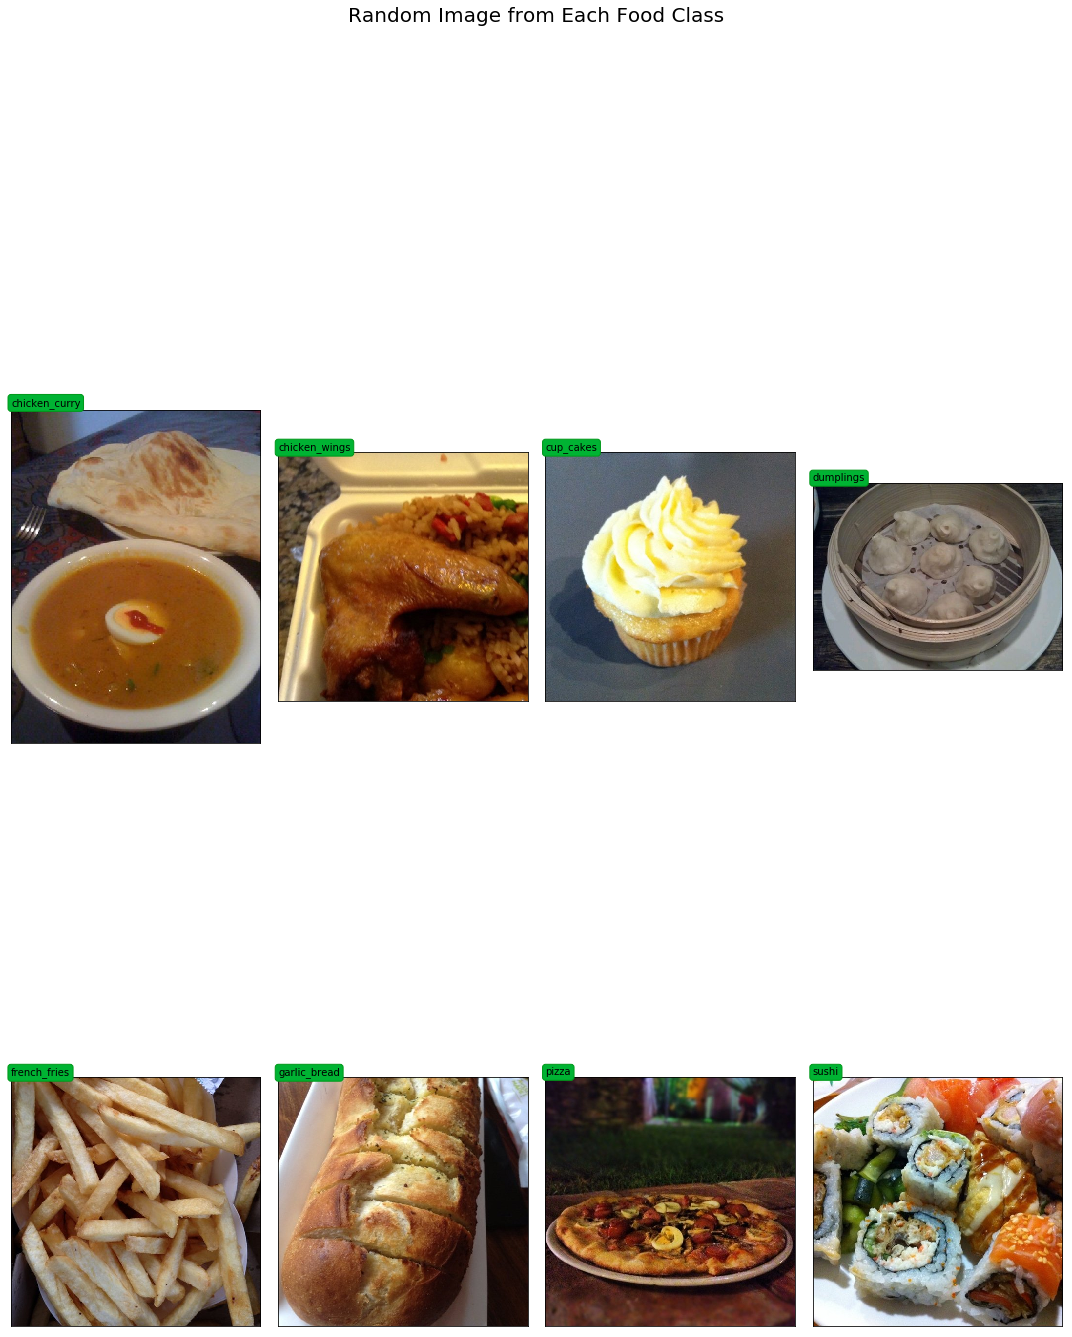

In [63]:


root_dir = 'food8/images/'
rows = 2
cols = 4
fig, ax = plt.subplots(rows, cols, frameon=False, figsize=(15, 25))
fig.suptitle('Random Image from Each Food Class', fontsize=20)
sorted_food_dirs = sorted(os.listdir(root_dir))
for i in range(rows):
    for j in range(cols):
        try:
            food_dir = sorted_food_dirs[i*cols + j]
        except:
            break
        all_files = os.listdir(os.path.join(root_dir, food_dir))
        rand_img = np.random.choice(all_files)
        img = plt.imread(os.path.join(root_dir, food_dir, rand_img))
        ax[i][j].imshow(img)
        ec = (0, .6, .1)
        fc = (0, .7, .2)
        ax[i][j].text(0, -20, food_dir, size=10, rotation=0,
                ha="left", va="top", 
                bbox=dict(boxstyle="round", ec=ec, fc=fc))
plt.setp(ax, xticks=[], yticks=[])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

           This is where the CNN is trained with 8000 images. 1000 images for each class

In [4]:
data_path = 'food8/'


X, Y = image_preloader(data_path + 'images/', image_shape = (200, 200), mode = 'folder')
#X_valid, Y_valid = image_preloader(data_path + 'images/', image_shape = (200, 200), mode = 'folder')

img_aug = ImageAugmentation()
img_aug.add_random_rotation(max_angle=25.)
img_aug.add_random_blur(sigma_max=3.)

network = input_data(shape=[None, 200, 200, 3],
                    data_augmentation=img_aug)

network = conv_2d(network, 32, 3, activation='relu')
network = max_pool_2d(network, 2)
network = conv_2d(network, 64, 3, activation='relu')
network = conv_2d(network, 64, 3, activation='relu')
network = max_pool_2d(network, 2)
network = fully_connected(network, 128, activation='relu')
network = dropout(network, 0.5)
network = fully_connected(network, 8, activation='softmax')
network = regression(network, optimizer='adam',
                     loss='categorical_crossentropy',
                     learning_rate=0.001)

model = tflearn.DNN(network, tensorboard_verbose=0,
                   best_val_accuracy = 0.6)
# model.fit(X, Y, n_epoch=5, shuffle=True,
#            batch_size=128,snapshot_epoch=True
#           )
# model.save('best_model8/model')

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.


       This cell is used for testing the model against images downloaded from Google.

In [64]:
def pred_checker(model, path):
    test_path = "test/"
    for item in os.listdir(test_path):
        im = Image.open(open("test/"+item, 'rb'))
        im = im.resize((200,200))
        pic = np.array(im)

        pic = pic.reshape(-1,200,200,3)
        pred = model.predict(pic)

        i = int(np.where(np.array(pred[0]) == np.max(pred))[0])
        p = sorted([c[38:] for c in glob(path + 'images/*')])[i]
        
        plt.imshow(im)
        plt.show()
        print(item)
        print('Prediction: ', p)
        
        

        with open("nutrition_values.csv") as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                if row["product_name"] == p:
                    #print("Food Name: ", row['product_name'])
                    print("Energy/100g: ", row["energy_100g"])
                    print("Carbohydrates/100g: ", row["carbohydrates_100g"])
                    print("Sugar/100g: ", row["sugars_100g"])
                    print("Proteins/100g: ", row["proteins_100g"])
                    print("Fat/100g: ", row["fat_100g"])
                    print("Fiber/100g: ", row["fiber_100g"])
                    print("Cholestrol/100g: ", row["cholesterol_100g"] +"\n\n")

                    break

INFO:tensorflow:Restoring parameters from C:\Semester 2\ML\SEEFOOD\best_model8\model


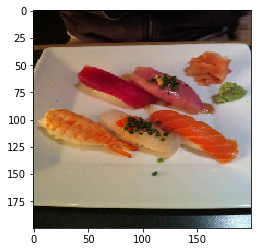

test1.jpg
Prediction:  sushi
Energy/100g:  300
Carbohydrates/100g:  400
Sugar/100g:  100
Proteins/100g:  10
Fat/100g:  90
Fiber/100g:  20
Cholestrol/100g:  5




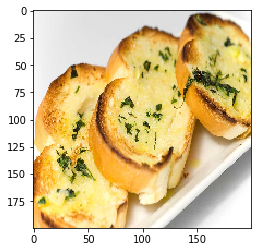

test2.jpg
Prediction:  garlic_bread
Energy/100g:  334.65975
Carbohydrates/100g:  44.73
Sugar/100g:  1.65
Proteins/100g:  8.228333333
Fat/100g:  13.585
Fiber/100g:  2.641666667
Cholestrol/100g:  0.00075




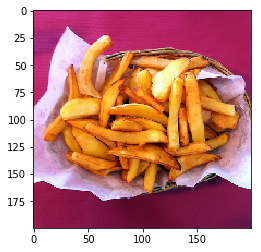

test3.jpg
Prediction:  french_fries
Energy/100g:  141.01
Carbohydrates/100g:  22.355
Sugar/100g:  0.59
Proteins/100g:  2.94
Fat/100g:  5
Fiber/100g:  2.4
Cholestrol/100g:  0




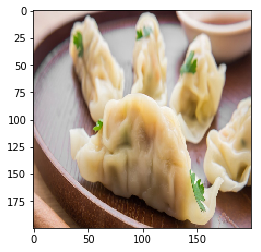

test4.jpg
Prediction:  dumplings
Energy/100g:  119.5
Carbohydrates/100g:  20.075
Sugar/100g:  0.66
Proteins/100g:  5.485
Fat/100g:  2.16
Fiber/100g:  0.95
Cholestrol/100g:  0.0065




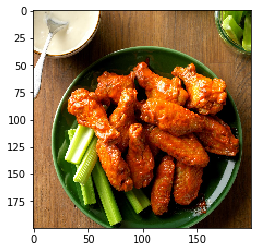

test5.jpg
Prediction:  chicken_wings
Energy/100g:  215.817
Carbohydrates/100g:  4.611666667
Sugar/100g:  1.792222222
Proteins/100g:  16.14277778
Fat/100g:  14.30611111
Fiber/100g:  0.066666667
Cholestrol/100g:  0.067944444




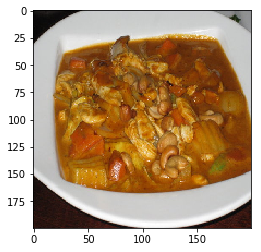

test6.jpg
Prediction:  chicken_curry
Energy/100g:  135.035
Carbohydrates/100g:  6.53
Sugar/100g:  2.685
Proteins/100g:  7.59
Fat/100g:  9.485
Fiber/100g:  1.6
Cholestrol/100g:  0.0295




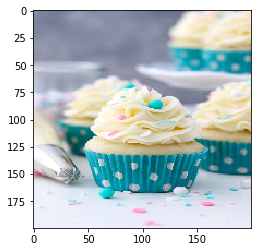

test7.jpg
Prediction:  cup_cakes
Energy/100g:  387.897
Carbohydrates/100g:  60
Sugar/100g:  45.88
Proteins/100g:  3.53
Fat/100g:  15.29
Fiber/100g:  2.4
Cholestrol/100g:  0.029




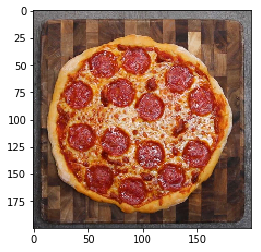

test8.jpg
Prediction:  pizza
Energy/100g:  251.12686
Carbohydrates/100g:  26.591
Sugar/100g:  2.262
Proteins/100g:  10.4336
Fat/100g:  11.2206
Fiber/100g:  1.264
Cholestrol/100g:  0.02194




In [65]:
# Prediction of images:

model.load('best_model8/model')
pred_checker(model, data_path)

   Here, we print out the official accuracy of the model calculated against the validation dataset.

In [60]:
test_path = 'valid/'
X_valid, Y_valid = image_preloader(test_path + 'images/', image_shape = (200, 200), mode = 'folder')

results=model.predict(X_valid)
accuracy = model.evaluate(X_valid, Y_valid)[0] * 100.0
print("Accuracy: "+ str(accuracy))


Accuracy: 73.23943376541138
